<a href="https://colab.research.google.com/github/TheDenk/augmixations/blob/master/examples/mixin_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install augmixations

In [2]:
import io
import cv2
import requests
import numpy as np
import PIL
from matplotlib import pyplot as plt

from augmixations import Mixin

##Help functions

In [3]:
def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return PIL.Image.open(io.BytesIO(resp.content))

def draw_boxes(new_img, boxes, labels):
    frame = new_img.copy()
    
    for (x1, y1, x2, y2), label in zip(boxes, labels): 
        thickness = 2
        font_scale = 1
    
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
        frame = cv2.putText(frame, label, (int(x1 + 10), int(y1 + 30)), cv2.FONT_HERSHEY_SIMPLEX ,  
                                   font_scale, (0, 0, 255), thickness, cv2.LINE_AA) 
        
    return frame

def show_img(image, figsize=(4, 6), title=None):
    img = image.copy()
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img)
    plt.axis(False)
    plt.show()

##Create images

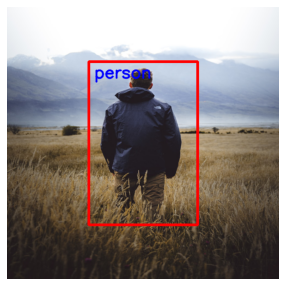

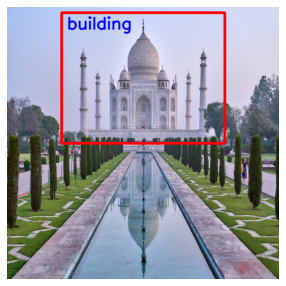

In [4]:
first_img = download_image('https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8aHVtYW58ZW58MHx8MHx8&ixlib=rb-1.2.1&w=1000&q=80')
second_img = download_image('https://images.unsplash.com/photo-1524492412937-b28074a5d7da?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8bW9udW1lbnR8ZW58MHx8MHx8&ixlib=rb-1.2.1&w=1000&q=80')

first_img = first_img.resize((500, 500))
second_img = second_img.resize((500, 500))

first_img = np.array(first_img) 
first_boxes = np.array([np.array([150, 100, 350, 400])])
first_labels = ['person']

second_img = np.array(second_img) 
second_boxes = np.array([np.array([100, 10, 400, 250])])
second_labels = ['building']


show_img(draw_boxes(first_img, first_boxes, first_labels), figsize=(5, 5))
show_img(draw_boxes(second_img, second_boxes, second_labels), figsize=(5, 5))

##Simple usage

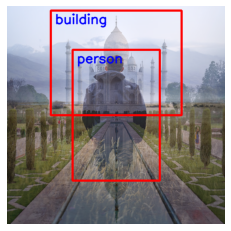

In [5]:
mixin = Mixin(transparency=(0.45, 0.75))
image, boxes, labels = mixin(first_img, first_boxes, first_labels, 
                             second_img, second_boxes, second_labels)

show_img(draw_boxes(image, boxes, labels), figsize=(12, 4))